In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools
import os
data=pd.read_csv("D:\Imarticus\ML-Repeat\DL_12dec\mushrooms.csv")

In [7]:
#!pip install chart-studio

A mushroom, or toadstool, is the fleshy, spore-bearing fruiting body of a fungus, typically produced above ground on soil or on its food source. 

In this kernel, looking at the various properties of a mushroom, we will predict whether the mushroom is edible or poisonous. 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In this dataset, there are various features and following table shows first 5 rows in dataset.

In [5]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


 To be more understandable, let's write properties one by one.

**classes:** edible=e, poisonous=p

**cap-shape:** bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

**cap-surface:** fibrous=f,grooves=g,scaly=y,smooth=s

**cap-color:** brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

**bruises:** bruises=t,no=f

**odor:** almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

**gill-attachment:** attached=a,descending=d,free=f,notched=n

**gill-spacing:** close=c,crowded=w,distant=d

**gill-size:** broad=b,narrow=n

**gill-color:** black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

**stalk-shape:** enlarging=e,tapering=t

**stalk-root:** bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

**stalk-surface-above-ring:** fibrous=f,scaly=y,silky=k,smooth=s

**stalk-surface-below-ring:** fibrous=f,scaly=y,silky=k,smooth=s

**stalk-color-above-ring:** brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

**stalk-color-below-ring:** brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

**veil-type:** partial=p,universal=u

**veil-color:** brown=n,orange=o,white=w,yellow=y

**ring-number:** none=n,one=o,two=t

**ring-type:** cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

**spore-print-color:** black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

**population:** abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

**habitat:** grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

Also, following image shows mushroom parts as we mentioned above.

![](https://i.pinimg.com/originals/0a/c6/4f/0ac64fb5a9c29823572de772f4ba1ff1.jpg)

**Cap:** The cap is the top of the mushroom (and often looks sort of like a small umbrella). Mushroom caps can come in a variety of colors but most often are brown, white, or yellow.

**Gills, Pores, or Teeth:** These structures appear under the mushroom's cap. They look similar to a fish's gills.

**Ring:** The ring (sometimes called the annulus) is the remaining structure of the partial veil after the gills have pushed through.

**Stem or Stipe:** The stem is the tall structure that holds the cap high above the ground.

**Volva:** The volva is the protective veil that remains after the mushroom sprouted up from the ground. As the fungus grows, it breaks through the volva.

**Spores:** Microscopic seeds acting as reproductive agents; they are usually released into the air and fall on a substrate to produce a new mushroom. 

(resource:https://1stchineseherbs.com/parts-of-mushrooms/, http://www.visualdictionaryonline.com/plants-gardening/plants/mushroom/structure-mushroom.php)

we've renamed all the features before we started analysis.

In [6]:
values={"b":"bell","c":"conical","x":"convex","f":"flat","k":"knobbed","s":"sunken"}
data["cap-shape"]=data["cap-shape"].replace(values)
values2={"f": "fibrous", "g": "grooves","y":"scaly","s": "smooth"}
data["cap-surface"]=data["cap-surface"].replace(values2)
values3={"n":"brown","b":"buff","c":"cinnamon","g":"gray","r":"green","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"}
data["cap-color"]=data["cap-color"].replace(values3)
values4={"a":"almond","l":"anise","c":"creosote","y":"fishy","f":"foul","m":"musty","n":"none","p":"pungent","s":"spicy"}
data["odor"]=data["odor"].replace(values4)
values5={"a":"attached","f":"free"}
data["gill-attachment"]=data["gill-attachment"].replace(values5)
values6={"c":"close","w":"crowded"}
data["gill-spacing"]=data["gill-spacing"].replace(values6)
values7={"b":"broad","n":"narrow"}
data["gill-size"]=data["gill-size"].replace(values7)
values8={"k":"black","b":"buff","n":"brown","h":"chocolate","g":"gray","r":"green","o":"orange","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"}
data["gill-color"]=data["gill-color"].replace(values8)
values9={"t":"tapering","e":"enlarging"}
data["stalk-shape"]=data["stalk-shape"].replace(values9)
values10={"b":"bulbous","c":"club","e":"equal","z":"rhizomorphs","r":"rooted","?":"missing"}
data["stalk-root"]=data["stalk-root"].replace(values10)
values11={"s":"smooth","k":"silky","f":"fibrous","y":"scaly"}
data["stalk-surface-above-ring"]=data["stalk-surface-above-ring"].replace(values11)
data["stalk-surface-below-ring"]=data["stalk-surface-below-ring"].replace(values11)
values12={"n":"brown","b":"buff","c":"cinnamon","g":"gray","p":"pink","e":"red","w":"white","y":"yellow","o":"orange"}
data["stalk-color-above-ring"]=data["stalk-color-above-ring"].replace(values12)
data["stalk-color-below-ring"]=data["stalk-color-below-ring"].replace(values12)
veil_type={"p":"partial","u":"universal"} 
data["veil-type"]=data["veil-type"].replace(veil_type)
veil_color={"n":"brown","o":"orange","w":"white","y":"yellow"} 
data["veil-color"]=data["veil-color"].replace(veil_color)
ring_number= {"n":"none","o":"one","t":"two"}
data["ring-number"]=data["ring-number"].replace(ring_number)
ring_type={"c":"cobwebby","e":"evanescent","f":"flaring","l":"large","n":"none","p":"pendant","s":"sheathing","z":"zone"}
data["ring-type"]=data["ring-type"].replace(ring_type)
spore_print_color= {"k":"black","n":"brown","b":"buff","h":"chocolate","r":"green","o":"orange","u":"purple","w":"white","y":"yellow"}
data["spore-print-color"]=data["spore-print-color"].replace(spore_print_color)
population={"a":"abundant","c":"clustered","n":"numerous","s":"scattered","v":"several","y":"solitary"}
data["population"]=data["population"].replace(population)
habitat={"g":"grasses","l":"leaves","m":"meadows","p":"paths","u":"urban","w":"waste","d":"woods"}
data["habitat"]=data["habitat"].replace(habitat)
bruises={"t":"bruises","f":"no"}
data["bruises"]=data["bruises"].replace(bruises)

Now, our dataset looks like this:

In [7]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,e,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,e,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,p,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,e,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [8]:
edible=data[data["class"]=="e"]
poisonous=data[data["class"]=="p"]

CAP SHAPE EXAMPLES

![](https://www.usask.ca/biology/fungi/graphics/glossary_pictures/glossary_pic15)

CAP SURFACE EXAMPLES

![](https://www.usask.ca/biology/fungi/graphics/glossary_pictures/glossary_pic16)

COMPARISON OF CAP SHAPE-SURFACE AND COLOR ACCORDING TO THEIR CLASSES

Following figure shows numbers and probabilities of cap shape- cap surface and cap color features according to the state of the mushroom being edible or poisonous.

In [9]:
class_dim = go.parcats.Dimension(
    values=data["class"].values,
    label="Mushroom Types",
    categoryarray=["e", "p"],
    ticktext=['edible', 'poisonous']
)

cap_shape_dim = go.parcats.Dimension(
    values=data["cap-shape"].values,
    label="Cap Shape"
)

cap_surface_dim = go.parcats.Dimension(
  values=data["cap-surface"].values,
  label="Cap Surface"
)
cap_color_dim = go.parcats.Dimension(
  values=data["cap-color"].values,
  label="Cap Color"
)

# Create parcats trace
color = [1 if i=="e" else 0 for i in data["class"]]
colorscale = [[0, 'lightcoral'], [1, 'mediumseagreen']];
data1 = [
    go.Parcats(
        dimensions=[class_dim,cap_surface_dim,cap_shape_dim,cap_color_dim],
        line={'color': color,
              'colorscale': colorscale},
        hoveron='dimension',
        hoverinfo='count+probability',
        labelfont={'size': 18, 'family': 'Times'},
        tickfont={'size': 16, 'family': 'Times'},
        arrangement='fixed',
    )

]


iplot(data1)

ARTIFICIAL NEURAL NETWORK

To perdict whether a mushroom is poisonous or edible, we use ANN classification. 

In [15]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in data.columns:
    data[column] = labelencoder.fit_transform(data[column])

In [16]:
y = data["class"].values
x = data.drop(["class"],axis=1)

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=1)

In [18]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library


In [19]:


def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 70,batch_size=10)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Epoch 1/70
4332/4332 [==============================] - 1s 124us/step - loss: 0.4674 - accuracy: 0.7955
Epoch 2/70
4332/4332 [==============================] - 0s 83us/step - loss: 0.2324 - accuracy: 0.9114
Epoch 3/70
4332/4332 [==============================] - 0s 82us/step - loss: 0.1703 - accuracy: 0.9418
Epoch 4/70
4332/4332 [==============================] - 0s 83us/step - loss: 0.1452 - accuracy: 0.9534
Epoch 5/70
4332/4332 [==============================] - 0s 81us/step - loss: 0.1307 - accuracy: 0.9584
Epoch 6/70
4332/4332 [==============================] - 0s 80us/step - loss: 0.1184 - accuracy: 0.9594
Epoch 7/70
4332/4332 [==============================] - 0s 88us/step - loss: 0.1087 - accuracy: 0.9619
Epoch 8/70
4332/4332 [==============================] - 0s 82us/step - loss: 0.0905 - accuracy: 0.9670
Epoch 9/70
4332/4332 [==============================] - 0s 84us/step - loss: 0.0763 - accuracy: 0.9714
Epoch 10/70
4332/4332 [==============================] - 0s 104us/step -

4333/4333 [==============================] - 0s 84us/step - loss: 0.0947 - accuracy: 0.9589
Epoch 8/70
4333/4333 [==============================] - 0s 95us/step - loss: 0.0848 - accuracy: 0.9665
Epoch 9/70
4333/4333 [==============================] - 0s 82us/step - loss: 0.0838 - accuracy: 0.9688
Epoch 10/70
4333/4333 [==============================] - 0s 88us/step - loss: 0.0742 - accuracy: 0.9730
Epoch 11/70
4333/4333 [==============================] - 0s 86us/step - loss: 0.0652 - accuracy: 0.9755
Epoch 12/70
4333/4333 [==============================] - 0s 85us/step - loss: 0.0623 - accuracy: 0.9760
Epoch 13/70
4333/4333 [==============================] - 0s 92us/step - loss: 0.0573 - accuracy: 0.9785
Epoch 14/70
4333/4333 [==============================] - 0s 87us/step - loss: 0.0600 - accuracy: 0.9765
Epoch 15/70
4333/4333 [==============================] - 0s 82us/step - loss: 0.0599 - accuracy: 0.9802
Epoch 16/70
4333/4333 [==============================] - 0s 83us/step - loss: 

After we run the model, we have 1 accuracy mean and 0 accuracy variance. Also following graphs shows tarining and validation accuracies and training & validation loss values.

In [20]:
history = classifier.fit(x_test, y_test, validation_split=0.20, epochs=70, batch_size=10, verbose=1)

# Plot training & validation accuracy values

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Train on 1300 samples, validate on 325 samples
Epoch 1/70
1300/1300 [==============================] - 0s 258us/step - loss: 0.6754 - accuracy: 0.6485 - val_loss: 0.5939 - val_accuracy: 0.8523
Epoch 2/70
1300/1300 [==============================] - 0s 108us/step - loss: 0.4255 - accuracy: 0.8677 - val_loss: 0.3572 - val_accuracy: 0.8708
Epoch 3/70
1300/1300 [==============================] - 0s 113us/step - loss: 0.2973 - accuracy: 0.8854 - val_loss: 0.3071 - val_accuracy: 0.8769
Epoch 4/70
1300/1300 [==============================] - 0s 102us/step - loss: 0.2535 - accuracy: 0.9077 - val_loss: 0.2691 - val_accuracy: 0.8892
Epoch 5/70
1300/1300 [==============================] - 0s 107us/step - loss: 0.2176 - accuracy: 0.9246 - val_loss: 0.2376 - val_accuracy: 0.9077
Epoch 6/70
1300/1300 [==============================] - 0s 107us/step - loss: 0.1910 - accuracy: 0.9369 - val_loss: 0.2170 - val_accuracy: 0.9077
Epoch 7/70
1300/1300 [==============================] - 0s 104us/step - loss:

KeyError: 'acc'

In [23]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

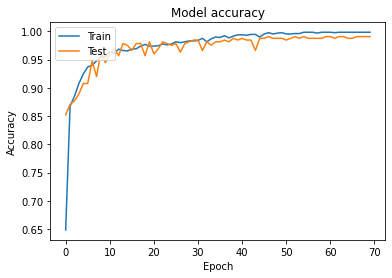

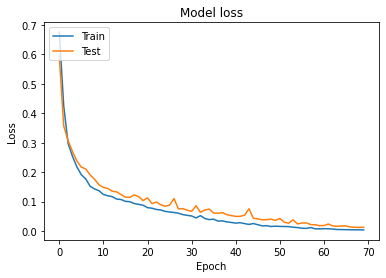

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()